# CPS 803 / CP 8318 Assignment 2
## CPS 803 [30 Marks]
## CP 8318 [36 Marks]

Andrew Benson 500745614

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


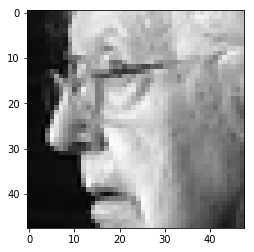

facial emotion: neutral


In [208]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [5]:
# YOUR CODE HERE

x_happy_sad_training=[]
y_happy_sad_training=[]

x_happy_sad_testing=[]
y_happy_sad_testing=[]

#1 = Happy
#0 = Sad

#filter throught training/testing dataset. Only keep rows that are labeled as happy or sad
for i in range(len(x_training)):
    #If the result is Happy
    if y_training[i][3]==1:
        x_happy_sad_training.append(x_training[i])
        y_happy_sad_training.append(1)
    #If the result is Sad
    elif y_training[i][4]==1:
        x_happy_sad_training.append(x_training[i])
        y_happy_sad_training.append(0)

        
for i in range(len(x_testing)):
     #If the result is Happy
    if y_testing[i][3]==1:
        x_happy_sad_testing.append(x_testing[i])
        y_happy_sad_testing.append(1)
    #If the result is Sad
    elif y_testing[i][4]==1:
        x_happy_sad_testing.append(x_testing[i])
        y_happy_sad_testing.append(0)    
        
        
        

print(y_happy_sad_training[:20])
print(y_happy_sad_testing[:20])
print(len(y_happy_sad_training))
print(len(x_happy_sad_training))
print(len(y_happy_sad_testing))
print(len(x_happy_sad_testing))

#print(x_happy_sad[0:2])

[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
12045
12045
1548
1548


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [6]:
print(len(x_happy_sad_training))
print(len(x_happy_sad_testing))

12045
1548


In [7]:
# YOUR CODE HERE
#Resize to not be 3 dimensions
x_happy_sad_training = np.array(x_happy_sad_training).reshape(12045,48*48)
x_happy_sad_testing = np.array(x_happy_sad_testing).reshape(1548,48*48)
print(x_happy_sad_training.shape)
print(x_happy_sad_testing.shape)

(12045, 2304)
(1548, 2304)


576
(12045, 576)
(1548, 576)


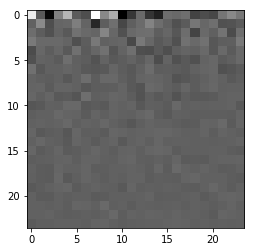

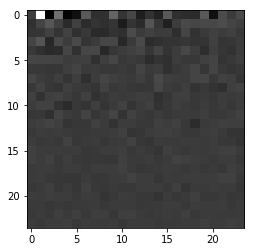

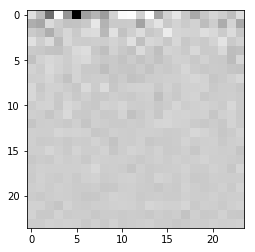

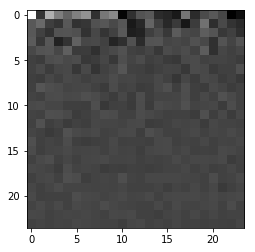

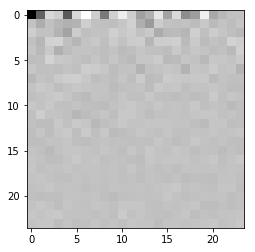

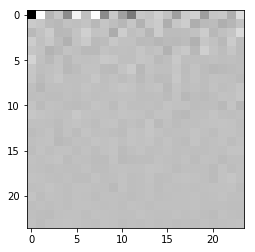

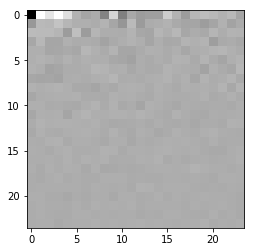

In [8]:
#PCA
from sklearn.decomposition import PCA

new_size = 24
pca = PCA(n_components =new_size*new_size)
pComponents = pca.fit(x_happy_sad_training)

x_happy_sad_trainingPCA = pca.transform(x_happy_sad_training)
x_happy_sad_testingPCA = pca.transform(x_happy_sad_testing)

print(pca.n_components_)
print(x_happy_sad_trainingPCA.shape)
print(x_happy_sad_testingPCA.shape)

for i in range(7):
    randIndex = np.random.randint(0,1000)
    sample1 = x_happy_sad_trainingPCA[randIndex]
    sample1 = sample1.reshape(new_size, new_size)

    plt.imshow(sample1, cmap='gray')
    plt.show()
    


(12045, 2304)
(12045, 1)
(1548, 1)


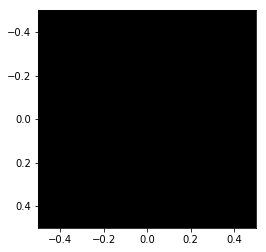

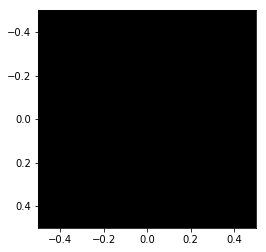

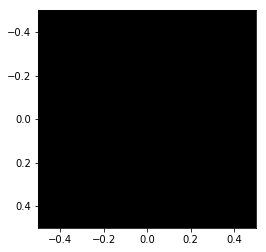

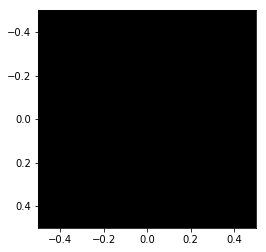

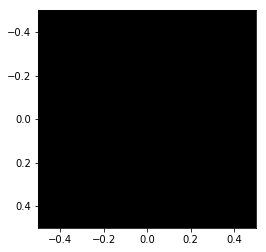

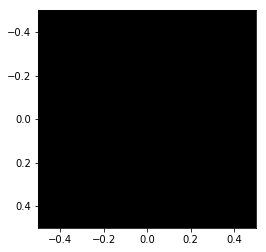

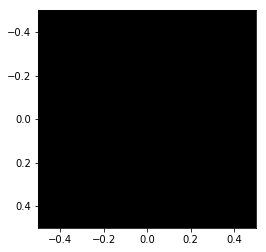

In [27]:
# #LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#new_size = 24
print(x_happy_sad_training.shape)
lda = LinearDiscriminantAnalysis(n_components=1) #n_components =new_size*new_size
pComponentsLDA = lda.fit(x_happy_sad_training,y_happy_sad_training)
x_happy_sad_trainingLDA = lda.transform(x_happy_sad_training)
x_happy_sad_testingLDA = lda.transform(x_happy_sad_testing)

#print(len(lda[0]))
print(x_happy_sad_trainingLDA.shape)
print(x_happy_sad_testingLDA.shape)

for i in range(7):
    randIndex = np.random.randint(0,1000)
    sample1 = x_happy_sad_trainingLDA[randIndex]
    #print(sample1)
    sample1 = sample1.reshape(1, 1)

    plt.imshow(sample1, cmap='gray')
    plt.show()

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [214]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

x_happy_sad_trainingNB = pca.transform(x_happy_sad_training)
x_happy_sad_testingNB = pca.transform(x_happy_sad_testing)

NBModel = GaussianNB()
NBModel.fit(x_happy_sad_trainingNB, y_happy_sad_training)

NB_preds = NBModel.predict(x_happy_sad_testingNB)

print(accuracy_score(y_happy_sad_testing,NB_preds))
print(classification_report(y_happy_sad_testing,NB_preds))


0.5684754521963824
              precision    recall  f1-score   support

           0       0.49      0.41      0.44       653
           1       0.61      0.68      0.65       895

   micro avg       0.57      0.57      0.57      1548
   macro avg       0.55      0.55      0.55      1548
weighted avg       0.56      0.57      0.56      1548



Naive Bays
Accuracy: ~56%


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [215]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

x_happy_sad_trainingLR = pca.transform(x_happy_sad_training)
x_happy_sad_testingLR = pca.transform(x_happy_sad_testing)

lr = LogisticRegression(random_state=0)
lr.fit(x_happy_sad_trainingLR, y_happy_sad_training)
lr_preds = lr.predict(x_happy_sad_testingLR)

print(accuracy_score(y_happy_sad_testing,lr_preds))
print(classification_report(y_happy_sad_testing,lr_preds))

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7183462532299741
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       653
           1       0.73      0.82      0.77       895

   micro avg       0.72      0.72      0.72      1548
   macro avg       0.71      0.70      0.70      1548
weighted avg       0.72      0.72      0.71      1548



Logistic Regression
Accuracy: ~72%

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [216]:
# YOUR CODE HERE
from sklearn import svm

x_happy_sad_trainingSVM = pca.transform(x_happy_sad_training)
x_happy_sad_testingSVM = pca.transform(x_happy_sad_testing)

svm_model = svm.SVC(gamma='scale')
svm_model.fit(x_happy_sad_trainingSVM, y_happy_sad_training)
svm_preds = svm_model.predict(x_happy_sad_testingSVM)

print(accuracy_score(y_happy_sad_testing,svm_preds))
print(classification_report(y_happy_sad_testing,svm_preds))

0.7409560723514211
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       653
           1       0.75      0.83      0.79       895

   micro avg       0.74      0.74      0.74      1548
   macro avg       0.74      0.72      0.73      1548
weighted avg       0.74      0.74      0.74      1548



Support Vector Machine Accuracy: ~74%

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Support vector machine and Logistic regression have the highest accuracy at around 73%. The two are very similar but penalize errors differently. I like SVM more because it is a bit more strict with errors and penalizes every error very similarly. Logistic regression has a more exponential way of penalizing the errors. I prefer SVM due its simplicity. 

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [10]:
# YOUR CODE HERE
from sklearn import svm

x_happy_sad_trainingSVM = pca.transform(x_happy_sad_training)
x_happy_sad_testingSVM = pca.transform(x_happy_sad_testing)

svm_model = svm.SVC(gamma='scale',probability = True)
svm_model.fit(x_happy_sad_trainingSVM, y_happy_sad_training)


probabilities = svm_model.predict_proba(x_happy_sad_testingSVM)
print(probabilities[:10])


[[0.89082196 0.10917804]
 [0.15178515 0.84821485]
 [0.3876728  0.6123272 ]
 [0.11259848 0.88740152]
 [0.64711652 0.35288348]
 [0.29943214 0.70056786]
 [0.47677734 0.52322266]
 [0.56466501 0.43533499]
 [0.67215671 0.32784329]
 [0.02822172 0.97177828]]


(1548, 2)
[ 491  816  948  472 1218]
[1132 1216  307 1452 1203]
Emotion: 0
Accuracy: 0.9950695051017683


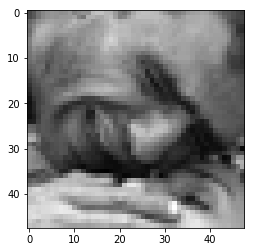

Emotion: 1
Accuracy: 0.9929692846429576


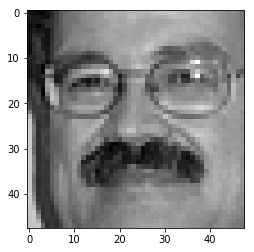

Emotion: 1
Accuracy: 0.9927007440680143


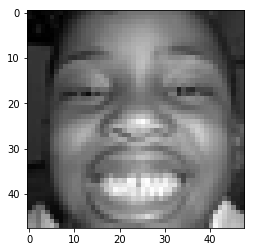

Emotion: 1
Accuracy: 0.9889071339213161


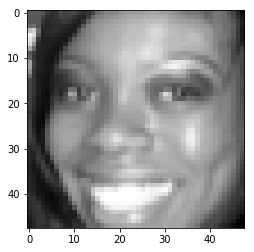

Emotion: 1
Accuracy: 0.9871946302683235


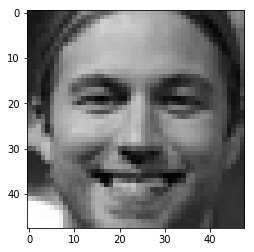

In [25]:
#Print 5 Happies Faces

probabilities = np.array(probabilities)
#probabilities.argsort()[-5][::-1]
print(probabilities.shape)
happyProbs = probabilities[:,1]
sadProbs = probabilities[:,0]

#Get the indcies of the highest values
happyIndex = happyProbs.argsort()[-5:][::-1]
sadIndex = sadProbs.argsort()[-5:][::-1]
print(happyIndex)
print(sadIndex)
#print(happyProbs[:5])
#print(sadProbs[:5])
print(" 0 = Sad  |  1 = Happy")
for i in happyIndex:
    sample = x_happy_sad_testing[i]
    sample = sample.reshape(48, 48)
    print("Actual Emotion:", y_happy_sad_testing[i])
    print("Predicted Emotion:", y_happy_sad_testing[i])
    print("Accuracy:" , happyProbs[i])
    plt.imshow(sample, cmap='gray')
    plt.show()


Emotion: 0
Accuracy: 0.9848876603471438


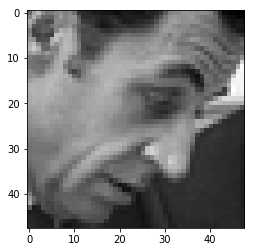

Emotion: 0
Accuracy: 0.9833105261509169


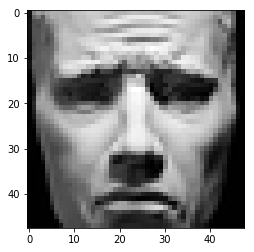

Emotion: 1
Accuracy: 0.9822980076128438


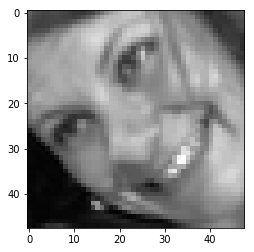

Emotion: 0
Accuracy: 0.9807417571227528


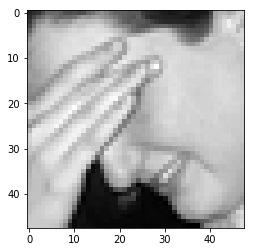

Emotion: 0
Accuracy: 0.9796404515683529


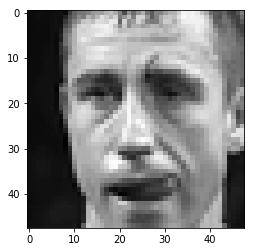

In [22]:
for i in sadIndex:
    sample = x_happy_sad_testing[i]
    sample = sample.reshape(48, 48)
    print("Emotion:", y_happy_sad_testing[i])
    print("Accuracy:" , sadProbs[i])
    plt.imshow(sample, cmap='gray')
    plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [21]:
#Change y values to 0-6 instead of an array

y_full_training=[]
y_full_testing=[]

#Training
for i in range(len(y_training)):
    #Angry =0
    if y_training[i][0]==1:
        y_full_training.append(0) 
    #Disgust = 1
    elif y_training[i][1]==1:
        y_full_training.append(1) 
    #Fear
    elif y_training[i][2]==1:
        y_full_training.append(2) 
    #Happy
    elif y_training[i][3]==1:
        y_full_training.append(3) 
    #Sad
    elif y_training[i][4]==1:
        y_full_training.append(4) 
    #Suprise
    elif y_training[i][5]==1:
        y_full_training.append(5) 
    #Neutral
    elif y_training[i][6]==1:
        y_full_training.append(6)         

#Testing
for i in range(len(y_testing)):
    #Angry =0
    if y_testing[i][0]==1:
        y_full_testing.append(0) 
    #Disgust = 1
    elif y_testing[i][1]==1:
        y_full_testing.append(1) 
    #Fear
    elif y_testing[i][2]==1:
        y_full_testing.append(2) 
    #Happy
    elif y_testing[i][3]==1:
        y_full_testing.append(3) 
    #Sad
    elif y_testing[i][4]==1:
        y_full_testing.append(4) 
    #Suprise
    elif y_testing[i][5]==1:
        y_full_testing.append(5) 
    #Neutral
    elif y_testing[i][6]==1:
        y_full_testing.append(6) 
        
y_full_training = np.array(y_full_training)
y_full_testing = np.array(y_full_testing)


print(y_full_training.shape)
print(y_full_testing.shape)     

(28709,)
(3589,)


In [22]:
# YOUR CODE HERE
#Reshape to be 2 dimensions
x_full_training = np.array(x_training).reshape(28709,48*48)
x_full_testing = np.array(x_testing).reshape(3589,48*48)
print(x_full_training.shape)
print(x_full_testing.shape)

(28709, 2304)
(3589, 2304)


576
(28709, 576)
(3589, 576)


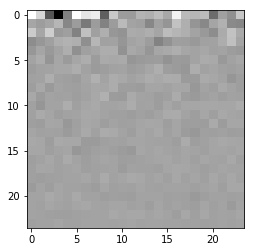

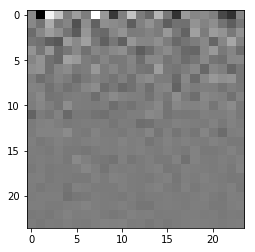

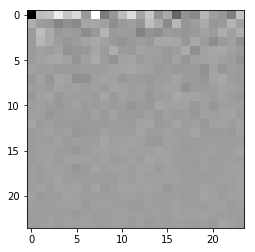

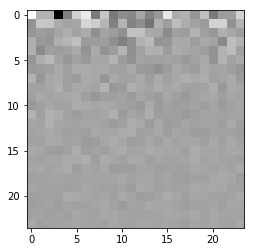

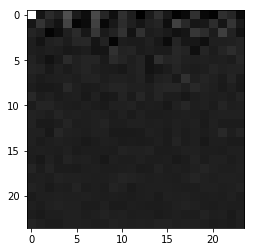

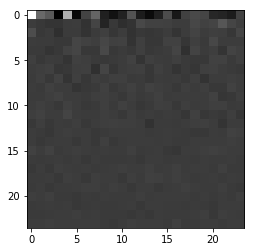

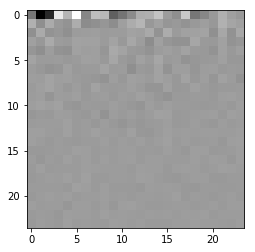

In [23]:
#PCA
from sklearn.decomposition import PCA

new_size = 24
pca = PCA(n_components =new_size*new_size)
pComponents = pca.fit(x_full_training)

x_full_trainingPCA = pca.transform(x_full_training)
x_full_testingPCA = pca.transform(x_full_testing)

print(pca.n_components_)
print(x_full_trainingPCA.shape)
print(x_full_testingPCA.shape)

for i in range(7):
    randIndex = np.random.randint(0,1000)
    sample1 = x_full_trainingPCA[randIndex]
    sample1 = sample1.reshape(new_size, new_size)

    plt.imshow(sample1, cmap='gray')
    plt.show()

In [26]:
#Plot variance curves

hs_variance = []
full_variance = []
n_components = []
for i in range(1,100):

    pca = PCA(n_components = i)
    pca2 = PCA(n_components = i)
    #Fit to just one image
    pca.fit(x_happy_sad_training)
    hs_variance.append(pca.explained_variance_.sum())
    pca2.fit(x_full_training)
    full_variance.append(pca2.explained_variance_.sum())
    n_components.append(i)
    i+=5
    


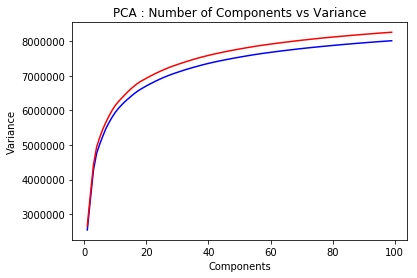

In [28]:
plt.plot(n_components,hs_variance,color = 'blue')
plt.plot(n_components,full_variance,color = 'red')
plt.title("PCA : Number of Components vs Variance")
plt.xlabel("Components")
plt.ylabel("Variance")
plt.show()

(28709, 2304)
(12045, 1)
(1548, 1)


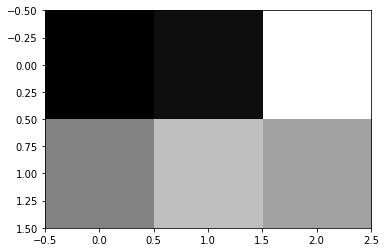

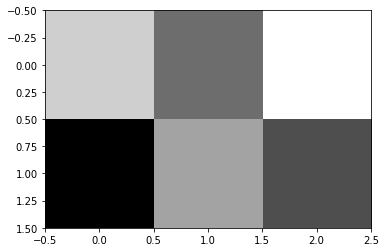

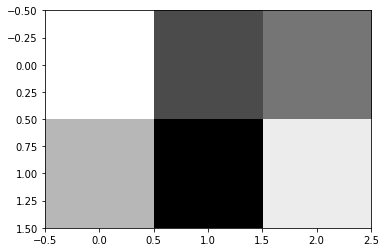

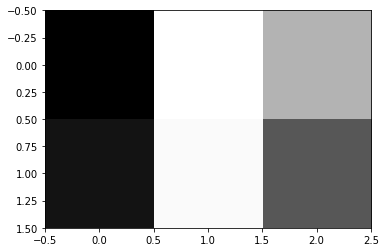

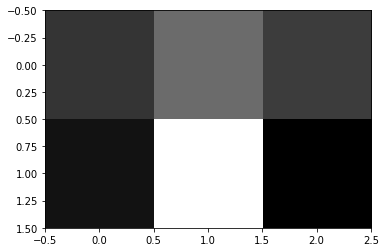

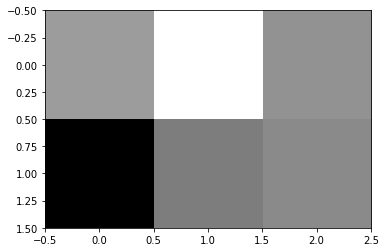

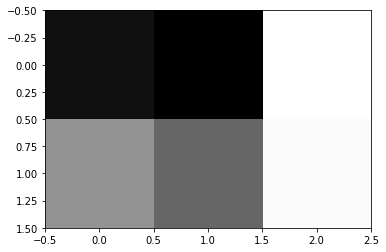

In [26]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#new_size = 24
print(x_full_training.shape)
lda = LinearDiscriminantAnalysis(n_components=6) #n_components =new_size*new_size
pComponentsLDA = lda.fit(x_full_training,y_full_training)
x_full_trainingLDA = lda.transform(x_full_training)
x_full_testingLDA = lda.transform(x_full_testing)

#print(len(lda[0]))
print(x_happy_sad_trainingLDA.shape)
print(x_happy_sad_testingLDA.shape)

for i in range(7):
    randIndex = np.random.randint(0,1000)
    sample1 = x_full_trainingLDA[randIndex]
    #print(sample1)
    sample1 = sample1.reshape(2, 3)

    plt.imshow(sample1, cmap='gray')
    plt.show()

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [10]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

x_full_trainingNB = pca.transform(x_full_training)
x_full_testingNB = pca.transform(x_full_testing)

NBModel = GaussianNB()
NBModel.fit(x_full_trainingNB, y_full_training)

NB_preds = NBModel.predict(x_full_testingNB)

print(accuracy_score(y_full_testing,NB_preds))
#print(classification_report(y_testing,NB_preds))

0.18974644747840624


Naive Bayes Multi Class Accuracy: ~18%

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

For Naive Bayes, the classifier will look at the different pixels while training and record the values of pixels or each emotion. When it trys to predict, it will look at the values of each pixel in the image, and calculate the probablity of the image being a particular emotion given the positions and values of each pixel. The emotion with the highest probability will be the emotion that the model predicts

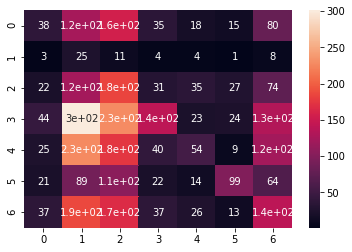

In [11]:
cm=confusion_matrix(y_full_testing,NB_preds)
sn.heatmap(cm, annot=True)
#plt.imshow(cm)
plt.show()

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [12]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

x_full_trainingLR = pca.transform(x_full_training)
x_full_testingLR = pca.transform(x_full_testing)

LRModel = LogisticRegression(random_state=0)
LRModel.fit(x_full_trainingLR, y_full_training)

LR_preds = LRModel.predict(x_full_testingLR)

print(accuracy_score(y_full_testing,LR_preds))
#print(classification_report(y_testing,NB_preds))


D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.38227918640289776


Linear Regression Multi Class Accuracy: ~38%

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

Multiple classes in logistic regression are still treated as binary problems. The model uses a one vs all method where it classifies one class vs the rest of the classes. It does this for every class. For example, it may classify Happy vs All other emotions. Then do the same for sad, angry, ect. 

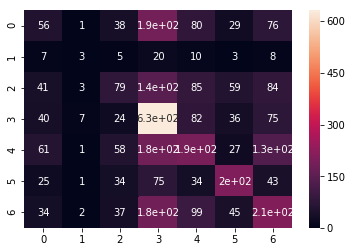

In [13]:
cm=confusion_matrix(y_full_testing,LR_preds)
sn.heatmap(cm, annot=True)
#plt.imshow(cm)
plt.show()

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [16]:
# YOUR CODE HERE

from sklearn import svm

x_full_trainingSVM = pca.transform(x_full_training)
x_full_testingSVM = pca.transform(x_full_testing)

SVMModel = svm.SVC(gamma='scale')
SVMModel.fit(x_full_trainingSVM, y_full_training)

SVM_preds = SVMModel.predict(x_full_testingSVM)

print(accuracy_score(y_full_testing,SVM_preds))
#print(classification_report(y_testing,NB_preds))

0.44692114795207577


SVM Multi Class Accuracy: ~44%



Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.

SVM works in a similar way to Logistic Regression for multiple classes. It breaks down multi class problems into many binary problems. Using a one vs all method, it will use support vectors to separate one emotion from the rest, and do the same for every other emotion. The functions that come out of each binary problem, put together can separate all classes from each other.

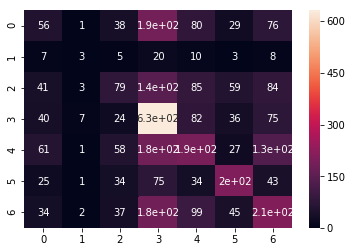

In [15]:
cm=confusion_matrix(y_full_testing,LR_preds)
sn.heatmap(cm, annot=True)
#plt.imshow(cm)
plt.show()

[2 Marks] e. Which categories of faces seem to be most similar or least similar?

Looking at the confusion matrices, it looks like classes 0,1,and 2 (Angry, Disgust, and Fear), had many wrong predictions. It is possible because these emotion look a lot like other emotions e.g. Angry looks alot like sad as shown in the confustion matrix.

Emotions 4,5,and 6 (Sad, Suprise, and Neutral) had the most correct predictions. These faces (maybe with the exception to sad) dont look like the other faces and it is easier for the model to predict them correctly. 

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

Answer:

One thing you could do is start by create a model that has a high accuracy. Then look at the the accuracies for all images within a single emotion. From there we can pick out the outliers by looking at the lowest confidence for those images. We can then look at what emotion has the highest confidence and re-label that image correctly. 

This will only work if there are a few outliers. If there are too many incorrectly labeled images, the model will not be accurate enough.

In [8]:
# YOUR CODE HERE

from sklearn import svm

x_full_trainingSVM = pca.transform(x_full_training)
x_full_testingSVM = pca.transform(x_full_testing)

#Train a model
SVMModel = svm.SVC(gamma='scale',probability =True)
SVMModel.fit(x_full_trainingSVM, y_full_training)
#Get the probabilities
SVM_probabilities = SVMModel.predict_proba(x_full_testingSVM)

print(SVM_probabilities[:5])



[[0.14126129 0.00613793 0.30840958 0.19471615 0.12421342 0.07845283
  0.1468088 ]
 [0.1263223  0.0510606  0.05053056 0.50103828 0.16143811 0.0254515
  0.08415865]
 [0.17642122 0.01215819 0.15091125 0.04599548 0.41334732 0.01705759
  0.18410895]
 [0.07660543 0.00971235 0.22950942 0.2325605  0.21139954 0.09357797
  0.14663479]
 [0.09723568 0.00851235 0.06892544 0.55618139 0.07538832 0.02504635
  0.16871046]]


0 = Angry | 1 = Disgust | 2 = Fear

3 = Happy | 4 = Sad     | 5 = Suprise   | 6 = Neutral

Original Labeling:  0

New Labeling: 2


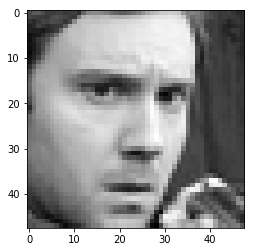

Original Labeling:  0

New Labeling: 3


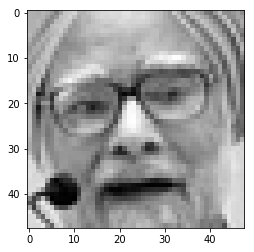

Original Labeling:  2

New Labeling: 4


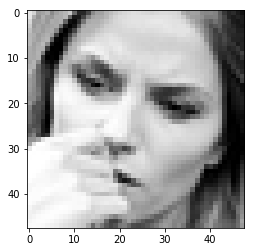

Original Labeling:  4

New Labeling: 3


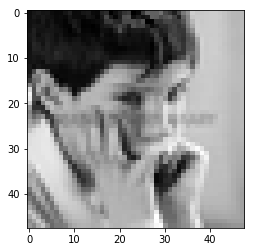

Original Labeling:  6

New Labeling: 3


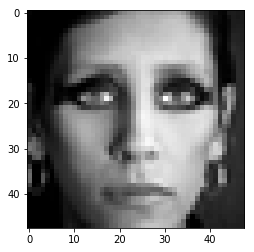

Original Labeling:  2

New Labeling: 3


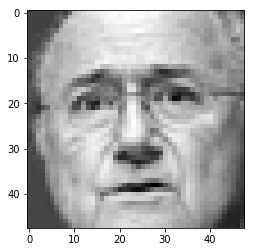

Original Labeling:  4

New Labeling: 0


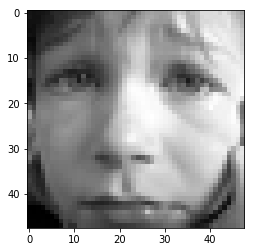

Original Labeling:  3

New Labeling: 4


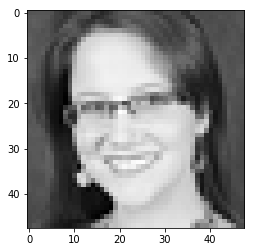

Original Labeling:  3

New Labeling: 4


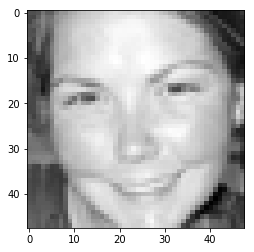

Original Labeling:  2

New Labeling: 5


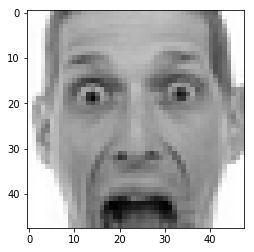

In [10]:
mislabeled_imagesX = []
mislabeled_imagesY = []
mislabeled_imagesOldY = []
#For each image, check if the prediction emotion matches the label
for i in range(len(SVM_probabilities)):
    #Index corresponds to the emotion
    high_prob_emotion = np.argmax(SVM_probabilities[i])
    if high_prob_emotion != y_full_training[i]:
        #y_full_training[i] = high_prob_emotion
        mislabeled_imagesX.append(x_full_training[i]) #Image values
        mislabeled_imagesY.append(high_prob_emotion)#Emotion with highest probability
        mislabeled_imagesOldY.append(y_full_training[i])#Original Labeling
        
#Print the first 10 mislabeled images
print("0 = Angry | 1 = Disgust | 2 = Fear\n")
print("3 = Happy | 4 = Sad     | 5 = Suprise   | 6 = Neutral\n")
for i in range(10):
    print("Original Labeling: ", mislabeled_imagesOldY[i])
    print("\nNew Labeling:", mislabeled_imagesY[i])
    sample1 = mislabeled_imagesX[i]
    #print(sample1)
    sample1 = sample1.reshape(48, 48)

    plt.imshow(sample1, cmap='gray')
    plt.show()

Here is an implementation to relabel images. My implementation didnt work that well becasuse the accuracy of the model was not very high. With a higher accuracy model, this should work better.

# 8318 only

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [43]:
# YOUR CODE HERE